In [1]:
#pip install tqdm

In [2]:
#pip install ipywidgets

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import seaborn as sns

### 1. Describe the dataset. (8 points)

In [4]:
df = pd.read_csv('data.csv')

C:\Users\fafab\AppData\Local\Temp\ipykernel_31224\1507164070.py:1: DtypeWarning: Columns (0,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data.csv')


In [5]:
# Describe the dataset
df.dtypes

Id                   object
Title                object
Company              object
Date                 object
Location             object
Area                 object
Classification       object
SubClassification    object
Requirement          object
FullDescription      object
LowestSalary          int64
HighestSalary         int64
JobType              object
dtype: object

In [6]:
df.describe()

,LowestSalary,HighestSalary
count,318477.000000,318477.000000
mean,65.813544,114.432342
std,51.063125,177.594941
min,0.000000,30.000000
25%,30.000000,40.000000
50%,60.000000,70.000000
75%,100.000000,120.000000
max,200.000000,999.000000


In [7]:
df.head(5)

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN


In [8]:
df.columns

Index(['Id', 'Title', 'Company', 'Date', 'Location', 'Area', 'Classification',
       'SubClassification', 'Requirement', 'FullDescription', 'LowestSalary',
       'HighestSalary', 'JobType'],
      dtype='object')

In [9]:
#How many records are there in the dataset? (1 point)
df.shape #((318477, 13))
print("The Dataset consists of: ",df.shape[0], " rows and ",df.shape[1], " columns")
df.describe()
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

The Dataset consists of:  318477  rows and  13  columns


Id                                object
Title                             object
Company                           object
Date                 datetime64[ns, UTC]
Location                          object
Area                              object
Classification                    object
SubClassification                 object
Requirement                       object
FullDescription                   object
LowestSalary                       int64
HighestSalary                      int64
JobType                           object
dtype: object

In [10]:
# Which period does it cover? How many different dates have job postings? (1 point) 
df['Date'].min()
df['Date'].max()
print("Period covered by the Date column:\n From",df['Date'].min(),"to",df['Date'].max())

Period covered by the Date column:
 From 2018-10-01 00:00:00+00:00 to 2019-03-13 00:00:00+00:00


In [11]:
#How many locations does the dataset have? 
len(df['Location'].unique()) #66
print("The dataset has",len(df['Location'].unique()),"locations")
#Which location has the most job postings?  (1 point)
print("The location with the most job postings is:",df['Location'].value_counts().idxmax(),".")

The dataset has 66 locations
The location with the most job postings is: Sydney .


In [12]:
df['Location'].value_counts()

Location
Sydney                                  60765
Melbourne                               46690
Brisbane                                21466
Perth                                   13198
Adelaide                                 6653
                                        ...  
Yorke Peninsula & Clare Valley             96
Tumut, Snowy & Monaro                      86
Somerset & Lockyer                         65
Fleurieu Peninsula & Kangaroo Island       64
Central & South East TAS                   57
Name: count, Length: 65, dtype: int64

In [13]:
df['Location'].value_counts()

Location
Sydney                                  60765
Melbourne                               46690
Brisbane                                21466
Perth                                   13198
Adelaide                                 6653
                                        ...  
Yorke Peninsula & Clare Valley             96
Tumut, Snowy & Monaro                      86
Somerset & Lockyer                         65
Fleurieu Peninsula & Kangaroo Island       64
Central & South East TAS                   57
Name: count, Length: 65, dtype: int64

In [14]:
#How many job sectors(job classifications) are there in the dataset? 31
print("There are",len(df['Classification'].unique()) ,"job classifications" )
#List the name of each sector and its’ total of job postings. (1 point) 
df['Classification'].value_counts()

There are 31 job classifications


Classification
Information & Communication Technology    22796
Trades & Services                         17976
Healthcare & Medical                      17085
Hospitality & Tourism                     15523
Manufacturing, Transport & Logistics      12376
Administration & Office Support           10020
Accounting                                 9368
Education & Training                       9280
Construction                               8372
Sales                                      8119
Retail & Consumer Products                 8041
Government & Defence                       7443
Engineering                                6458
Mining, Resources & Energy                 6288
Banking & Financial Services               4633
Community Services & Development           4485
Legal                                      4237
Human Resources & Recruitment              4144
Call Centre & Customer Service             3971
Marketing & Communications                 3968
Real Estate & Property   

In [15]:
# Choose your favorite job sector (e.g. Information & Communication Technology), how many sub-sectors are there in that sector?
df_it= df[df['Classification'] == "Information & Communication Technology"]
df_it.head(3)
print("There are",len(df_it['SubClassification'].unique()) ,"job SubClassification in ICT" )
#List the name of each sub-sector and its’ job posting number. (1 point) 

There are 22 job SubClassification in ICT


In [16]:
df_it['SubClassification'].unique()
print("SubClassification posting numbers in ICT")
df_it['SubClassification'].value_counts()

SubClassification posting numbers in ICT


SubClassification
Developers/Programmers                   4211
Business/Systems Analysts                2986
Programme & Project Management           2413
Architects                               1548
Engineering - Software                   1437
Help Desk & IT Support                   1374
Networks & Systems Administration        1194
Consultants                              1149
Other                                     997
Testing & Quality Assurance               831
Security                                  774
Management                                746
Engineering - Network                     552
Database Development & Administration     551
Web Development & Production              452
Sales - Pre & Post                        449
Product Management & Development          376
Telecommunications                        357
Team Leaders                              173
Engineering - Hardware                    116
Technical Writing                          97
Computer Operato

In [17]:
#List the salary ranges and their total of job postings. (1 point) 
df_it['HighestSalary'].max() #999
df_it['HighestSalary'].min() #30
df_it['LowestSalary'].max() #200
df_it['LowestSalary'].min() #0
print("The salary ranges and their total of job postings are from",df_it['HighestSalary'].max(),"to",df_it['LowestSalary'].min())

The salary ranges and their total of job postings are from 999 to 0


In [18]:
df_it['HighestSalary'].max() #999
df_it['LowestSalary'].min() #0

0

In [19]:
df_it['HighestSalary'].value_counts()

HighestSalary
200    5650
30     3670
150    3537
999    3452
120    2765
100    1334
80      842
70      620
60      347
50      300
40      279
Name: count, dtype: int64

In [20]:
df_it['LowestSalary'].value_counts()

LowestSalary
150    5650
0      3670
120    3537
200    3452
100    2765
80     1334
70      842
60      620
50      347
40      300
30      279
Name: count, dtype: int64

In [21]:
df_it.head(3)

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
89,37404291,Technical Support Engineer,FTI Consulting,2018-10-07 00:00:00+00:00,Sydney,"CBD, Inner West & Eastern Suburbs",Information & Communication Technology,Help Desk & IT Support,Act as an advisor to staff in all practice are...,NaN,0,30,NaN
96,37404325,Business Development Manager,TPG Telecom Limited,2018-10-07 00:00:00+00:00,Perth,"CBD, Inner & Western Suburbs",Information & Communication Technology,Sales - Pre & Post,Looking to get your foot in the door in a care...,NaN,0,30,NaN
127,37404230,Systems Engineer,Humanised Group,2018-10-07 00:00:00+00:00,Brisbane,CBD & Inner Suburbs,Information & Communication Technology,Networks & Systems Administration,Systems Engineer to work on BAU/Projects for a...,<strong>The Company</strong><br> <br> This org...,0,30,Full Time


In [22]:
# List the job types. In each job type, what are the lowest salary and highest salary? (1 point)
df_it['SubClassification']

89                   Help Desk & IT Support
96                       Sales - Pre & Post
127       Networks & Systems Administration
130          Programme & Project Management
133                  Help Desk & IT Support
                        ...                
197204                          Consultants
197208                          Consultants
197217       Programme & Project Management
197218          Testing & Quality Assurance
197228    Networks & Systems Administration
Name: SubClassification, Length: 22796, dtype: object

In [23]:
for sub in df_it['SubClassification'].unique():
    print()
    subMaxSlary = df_it[df_it['SubClassification']== sub]['HighestSalary'].max()
    subMinxSlary = df_it[df_it['SubClassification']== sub]['LowestSalary'].min()
    print(sub,"\nThe MaxSlary is:",subMaxSlary,"\nThe min salary is:",subMinxSlary)


Help Desk & IT Support 
The MaxSlary is: 999 
The min salary is: 0

Sales - Pre & Post 
The MaxSlary is: 999 
The min salary is: 0

Networks & Systems Administration 
The MaxSlary is: 999 
The min salary is: 0

Programme & Project Management 
The MaxSlary is: 999 
The min salary is: 0

Security 
The MaxSlary is: 999 
The min salary is: 0

Consultants 
The MaxSlary is: 999 
The min salary is: 0

Architects 
The MaxSlary is: 999 
The min salary is: 0

Other 
The MaxSlary is: 999 
The min salary is: 0

Business/Systems Analysts 
The MaxSlary is: 999 
The min salary is: 0

Developers/Programmers 
The MaxSlary is: 999 
The min salary is: 0

Web Development & Production 
The MaxSlary is: 999 
The min salary is: 0

Engineering - Software 
The MaxSlary is: 999 
The min salary is: 0

Product Management & Development 
The MaxSlary is: 999 
The min salary is: 0

Engineering - Network 
The MaxSlary is: 999 
The min salary is: 0

Team Leaders 
The MaxSlary is: 999 
The min salary is: 0

Testing & 

### 2. Normalize and clean data. (7 points)

In [24]:
#1.The salaries are kept in the dataset as “HighestSalary” and “LowestSalary”. 
#You should calculate the “AverageSalary” for each job. (1 point) 

In [25]:
df["AverageSalary"] = (df['HighestSalary']+df['LowestSalary'])/2
df.head(3)

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07 00:00:00+00:00,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07 00:00:00+00:00,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07 00:00:00+00:00,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,15.0


#### ✓ The raw dataset values of the "Id" column had inconsistencies in their representation. The Id values should have 8 number long integers only. Write code to remove unnecessary characters. (1 point) 

In [26]:
df['Id'].describe()

count       318477
unique      318477
top       37404348
freq             1
Name: Id, dtype: int64

In [27]:
df['Id'].shape

(318477,)

In [28]:
invalid_ids = df['Id'][~df['Id'].astype(str).str.match(r'^\d{8}$')] 
print(invalid_ids.iloc[0])
invalid_ids

37915260&searchrequesttoken=e859cc74-e22f-498d-ac7c-77a7e1b45676


153767    37915260&searchrequesttoken=e859cc74-e22f-498d...
153768    37915238&searchrequesttoken=e859cc74-e22f-498d...
153769    37915306&searchrequesttoken=e859cc74-e22f-498d...
153770    37915157&searchrequesttoken=e859cc74-e22f-498d...
153771    37915257&searchrequesttoken=e859cc74-e22f-498d...
                                ...                        
197224    37828217&searchrequesttoken=5f3040c0-7469-48cc...
197225    37828093&searchrequesttoken=5f3040c0-7469-48cc...
197226    37828001&searchrequesttoken=5f3040c0-7469-48cc...
197227    37827910&searchrequesttoken=5f3040c0-7469-48cc...
197228    37827864&searchrequesttoken=4e09ab58-a889-41f7...
Name: Id, Length: 43462, dtype: object

In [29]:
invalid_ids.iloc[0]

'37915260&searchrequesttoken=e859cc74-e22f-498d-ac7c-77a7e1b45676'

In [30]:
invalid_ids.count()

43462

In [31]:
df['Id'] = df['Id'].astype(str).apply(lambda x: x if x.isdigit() and len(x) == 8 else x.split('&')[0])

In [32]:
invalid_ids = df['Id'][~df['Id'].astype(str).str.match(r'^\d{8}$')]  
print(invalid_ids)

Series([], Name: Id, dtype: object)


### ✓ The "Date" column is represented in a format that contained both date and time information. However, the time is not correct and should be removed. (1 point) 

In [33]:
df['Date'] #2018-10-07 00:00:00+00:00 dtype: datetime64[ns, UTC]
# keep only the date
df['Date'] = df['Date'].dt.date
df['Date']

0         2018-10-07
1         2018-10-07
2         2018-10-07
3         2018-10-07
4         2018-10-07
             ...    
318472    2019-03-13
318473    2019-03-13
318474    2019-03-12
318475    2019-03-08
318476    2019-03-13
Name: Date, Length: 318477, dtype: object

#### Change type of “Id” column to numeric and change type of “Date” column to DateTime. (1 point)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318477 entries, 0 to 318476
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Id                 318477 non-null  object 
 1   Title              318477 non-null  object 
 2   Company            306473 non-null  object 
 3   Date               318477 non-null  object 
 4   Location           197229 non-null  object 
 5   Area               122658 non-null  object 
 6   Classification     197229 non-null  object 
 7   SubClassification  197229 non-null  object 
 8   Requirement        318470 non-null  object 
 9   FullDescription    302302 non-null  object 
 10  LowestSalary       318477 non-null  int64  
 11  HighestSalary      318477 non-null  int64  
 12  JobType            302379 non-null  object 
 13  AverageSalary      318477 non-null  float64
dtypes: float64(1), int64(2), object(11)
memory usage: 34.0+ MB


In [35]:
#Change type of “Id” column to numeric 
df['Id'] = pd.to_numeric(df['Id'], errors='raise')
df['Id']

0         37404348
1         37404337
2         37404356
3         37404330
4         37404308
            ...   
318472    38564891
318473    38564940
318474    38552964
318475    38534438
318476    38561751
Name: Id, Length: 318477, dtype: int64

In [36]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date']

0        2018-10-07
1        2018-10-07
2        2018-10-07
3        2018-10-07
4        2018-10-07
            ...    
318472   2019-03-13
318473   2019-03-13
318474   2019-03-12
318475   2019-03-08
318476   2019-03-13
Name: Date, Length: 318477, dtype: datetime64[ns]

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318477 entries, 0 to 318476
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Id                 318477 non-null  int64         
 1   Title              318477 non-null  object        
 2   Company            306473 non-null  object        
 3   Date               318477 non-null  datetime64[ns]
 4   Location           197229 non-null  object        
 5   Area               122658 non-null  object        
 6   Classification     197229 non-null  object        
 7   SubClassification  197229 non-null  object        
 8   Requirement        318470 non-null  object        
 9   FullDescription    302302 non-null  object        
 10  LowestSalary       318477 non-null  int64         
 11  HighestSalary      318477 non-null  int64         
 12  JobType            302379 non-null  object        
 13  AverageSalary      318477 non-null  float64 

#### ✓ Are there any duplicate data in the dataset? Provide the way you find them and your solution to fix it. **  (1.5 point) 

In [38]:
duplicates = df.duplicated()
print("Number of duplicate rows:", duplicates.sum())
# drop duplicates and keep the fisrt row
df = df.drop_duplicates(keep='first')
# check
print("Number of duplicate rows:", duplicates.sum())
print("Number of rows after removing duplicates:", len(df))

Number of duplicate rows: 108
Number of duplicate rows: 108
Number of rows after removing duplicates: 318369


#### ✓ Check missing data and visualize them in a corresponding chart.** (1.5 point) 

In [39]:
# Calculate the number of missing values per column
missing_data = df.isnull().sum()
missing_data

Id                        0
Title                     0
Company               11997
Date                      0
Location             121248
Area                 195787
Classification       121248
SubClassification    121248
Requirement               7
FullDescription       16135
LowestSalary              0
HighestSalary             0
JobType               16058
AverageSalary             0
dtype: int64

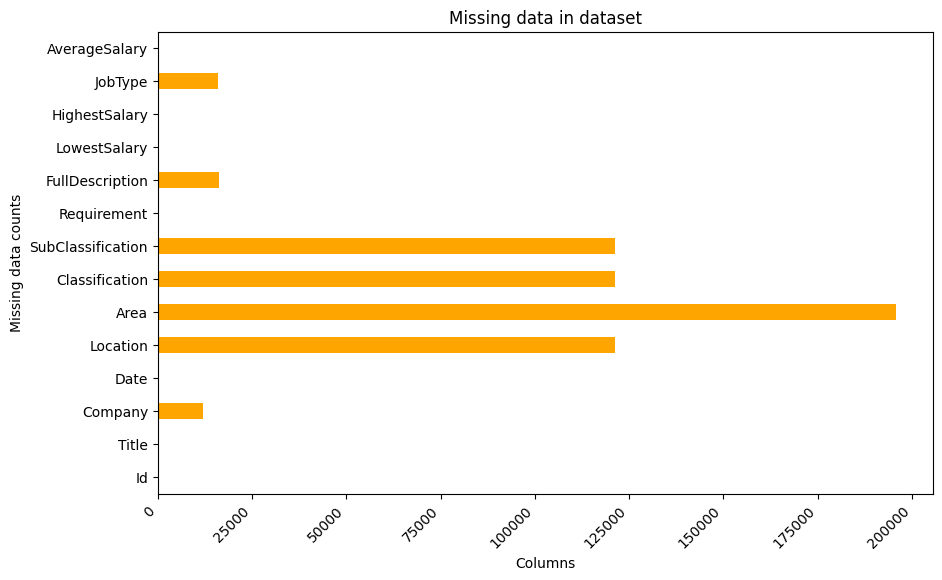

In [40]:
# Create a horizontal bar chart
plt.figure(figsize=(10, 6)) 
missing_data.plot(kind='barh', color='orange') 
plt.title('Missing data in dataset')  
plt.xlabel('Columns')  
plt.ylabel('Missing data counts') 
plt.xticks(rotation=45, ha='right') 
plt.show()  

## Part 2 – Data Understanding. [5 points]

#### ✓ Get the salary ranges using “AverageSalary”, the total jobs of each range and display them in the bar chart. (1 point)

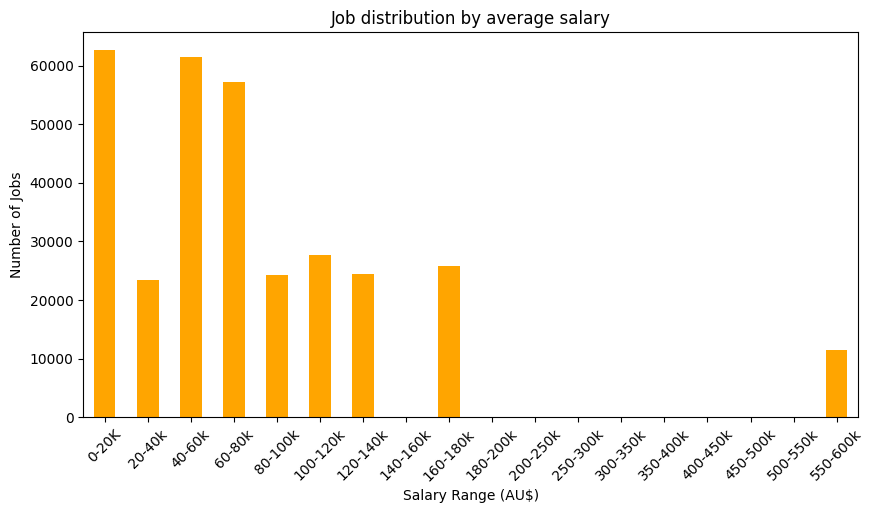

In [41]:
df['AverageSalary'].max() #599.5
df['AverageSalary'].min() #15.0

# Define salary ranges
bins = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 250, 300, 350, 400, 450, 500, 550, 600]

# Create labels for these bins
labels = ['0-20K', '20-40k', '40-60k', '60-80k', '80-100k', '100-120k', '120-140k', '140-160k', '160-180k', '180-200k', 
          '200-250k', '250-300k', '300-350k', '350-400k', '400-450k', '450-500k', '500-550k', '550-600k']

# Categorize the average salaries into the bins
df['SalaryRange'] = pd.cut(df['AverageSalary'], bins=bins, labels=labels, right=False)

# Calculate the number of jobs in each range
salary_distribution = df['SalaryRange'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(10, 5))
salary_distribution.plot(kind='bar', color='orange')
plt.title('Job distribution by average salary')
plt.xlabel('Salary Range (AU$)')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45)
plt.show()

#### ✓ Display the list of job types and the number of jobs of each type using pie chart. (1 point) 

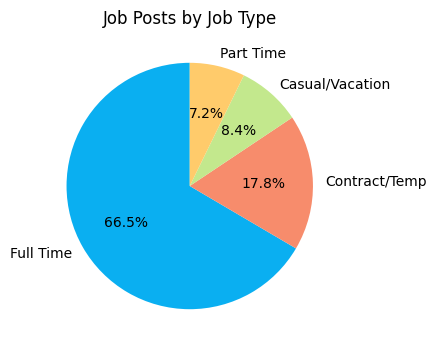

In [42]:
# Calculate the number of jobs for each job type
job_type_counts = df['JobType'].value_counts()

# Plot a pie chart
plt.figure(figsize=(4, 4))  # Adjust the figure size as needed
plt.pie(job_type_counts, labels=job_type_counts.index, autopct='%1.1f%%', startangle=90, colors=['#0aaff1', '#f78c6c', '#c3e88d', '#ffcb6b'])
plt.title('Job Posts by Job Type')  # Set the title of the pie chart
plt.show()

#### ✓ Display the list of job sectors and the number of jobs of each type using horizontal bar chart. (1 point) 

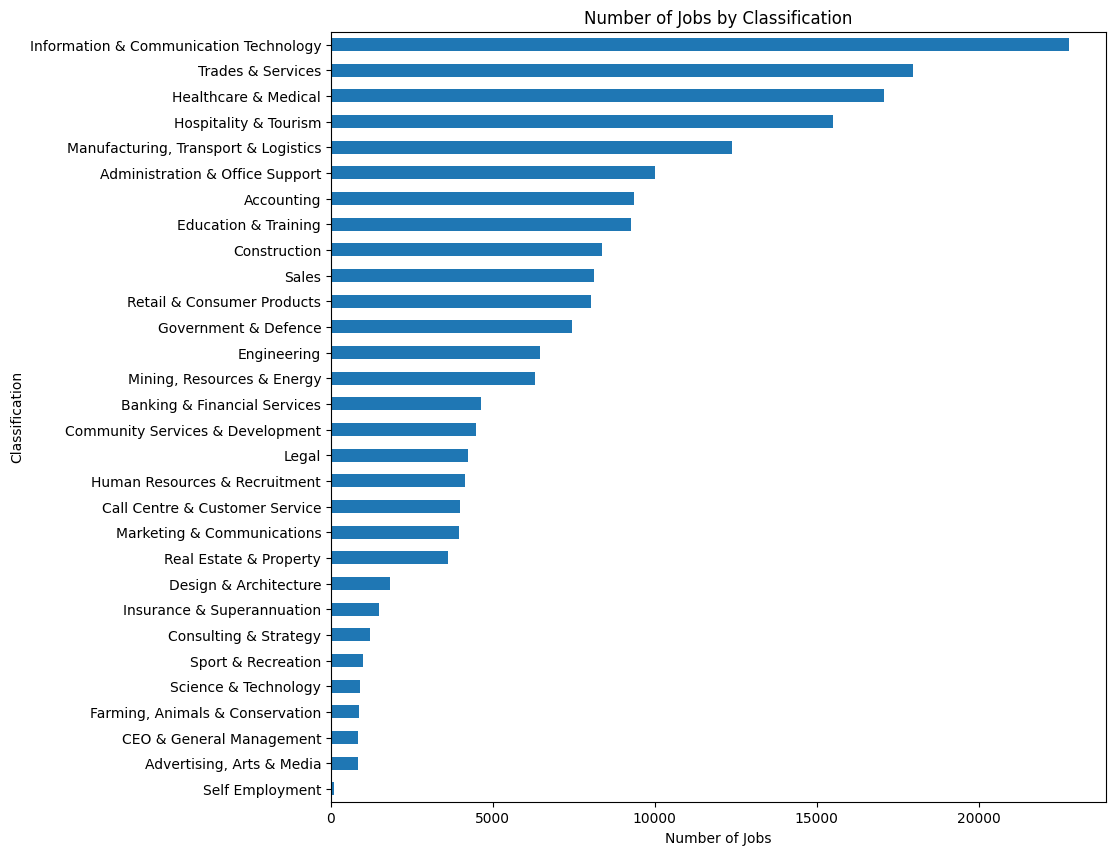

In [43]:
d= df['Classification'].value_counts().sort_values()
plt.figure(figsize=(10, 10))  # Adjust the figure size as necessary
d.plot(kind='barh') 
plt.title('Number of Jobs by Classification')  # Set the title of the chart
plt.xlabel('Number of Jobs')  # Set the x-axis label
plt.ylabel('Classification')  # Set the y-axis label
plt.show()

#### ✓ Choose your favorite location. Visualize the market share of that location in pie chart. (1 point) 

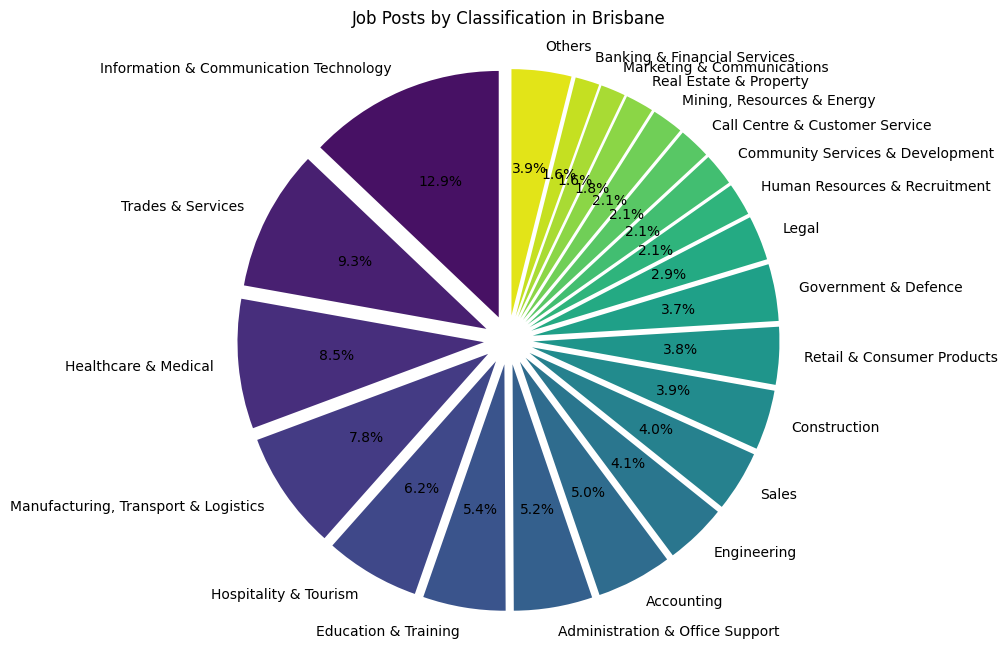

In [44]:
# Calculate the number of jobs in Brisbane for each classification
brisbane_classifications = df[df['Location'] == 'Brisbane']['Classification'].value_counts()

# Combine classifications < 1% to "Others"
threshold = 0.01 * brisbane_classifications.sum()
others = brisbane_classifications[brisbane_classifications < threshold].sum()
brisbane_classifications = brisbane_classifications[brisbane_classifications >= threshold]
brisbane_classifications['Others'] = others

# Create explode parameters for the pie chart to slightly separate each slice
explode = [0.1 if count > threshold else 0 for count in brisbane_classifications]

# plot pie chart
plt.figure(figsize=(10, 8))
plt.pie(brisbane_classifications, labels=brisbane_classifications.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("viridis", len(brisbane_classifications)), explode=explode)
plt.title('Job Posts by Classification in Brisbane')
plt.show()

#### ✓ Can you find the salary distribution for the top 30 cities for the number of job postings?Visualize them in the boxplot chart. (1 point) 

C:\Users\fafab\AppData\Local\Temp\ipykernel_31224\255837483.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box_plt_high = sns.boxplot(x='Location',y='HighestSalary',data=df_salary_locations_high, order=df_top_30,palette='BrBG_r')
C:\Users\fafab\AppData\Local\Temp\ipykernel_31224\255837483.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  box_plt_high.set_xticklabels(box_plt_high.get_xticklabels(),rotation=90,fontsize=20)


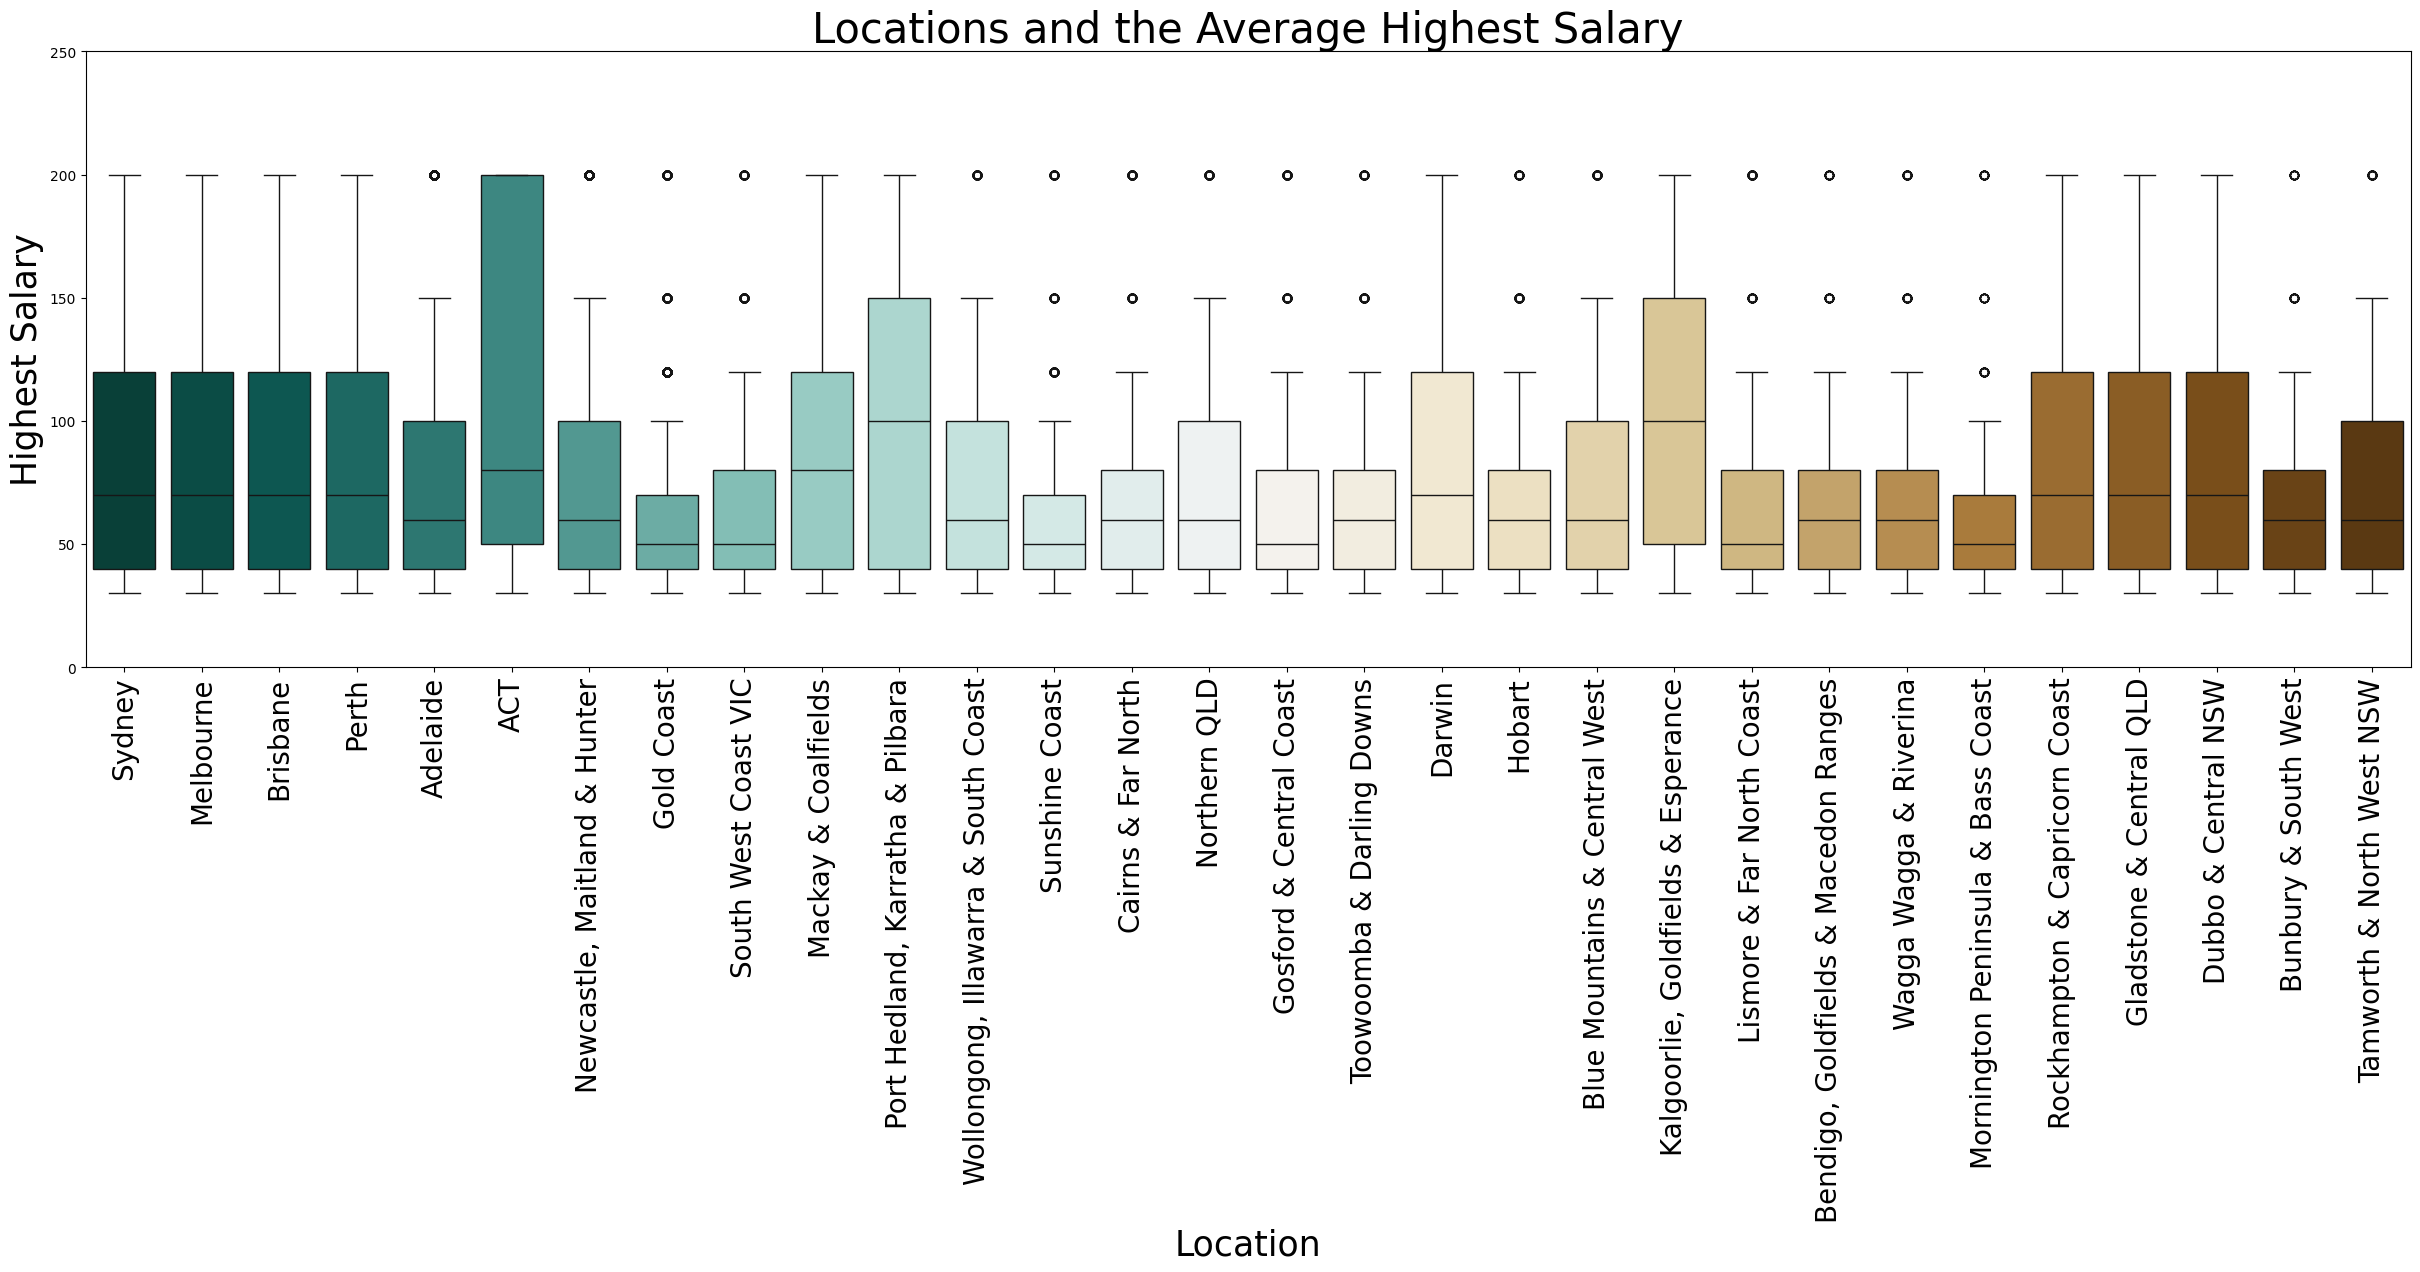

In [45]:
import seaborn as sns
#get a list of locations ordered by Highest Salary (Average) descending
df_location = df[df['Location'].isna()==False]
df_top_30 = df_location.groupby(['Location']).count().reset_index().sort_values(by=['Title'],ascending=False)[:30]['Location'].tolist()
df_salary_locations_high = df[df['Location'].isin(df_top_30)]

plt.figure(figsize=(30,8))

box_plt_high = sns.boxplot(x='Location',y='HighestSalary',data=df_salary_locations_high, order=df_top_30,palette='BrBG_r')
box_plt_high.set_xticklabels(box_plt_high.get_xticklabels(),rotation=90,fontsize=20)
plt.title('Locations and the Average Highest Salary',size=30)
plt.ylabel('Highest Salary',fontsize=25)
plt.xlabel('Location',fontsize=25)

plt.ylim([0,250])
plt.show()

## Part 3 – Data Analysis and Visualisation. [6 points] 

### 1. Analyse by comparison. (2 points) 
##### Choose your two favourite cities/locations. We will explore the difference between them by answering the following questions: 

C:\Users\fafab\AppData\Local\Temp\ipykernel_31224\3293726724.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  loc_plot = sns.barplot(x=df_location['Count'], y=df_location['Location'], palette='RdYlGn_r')


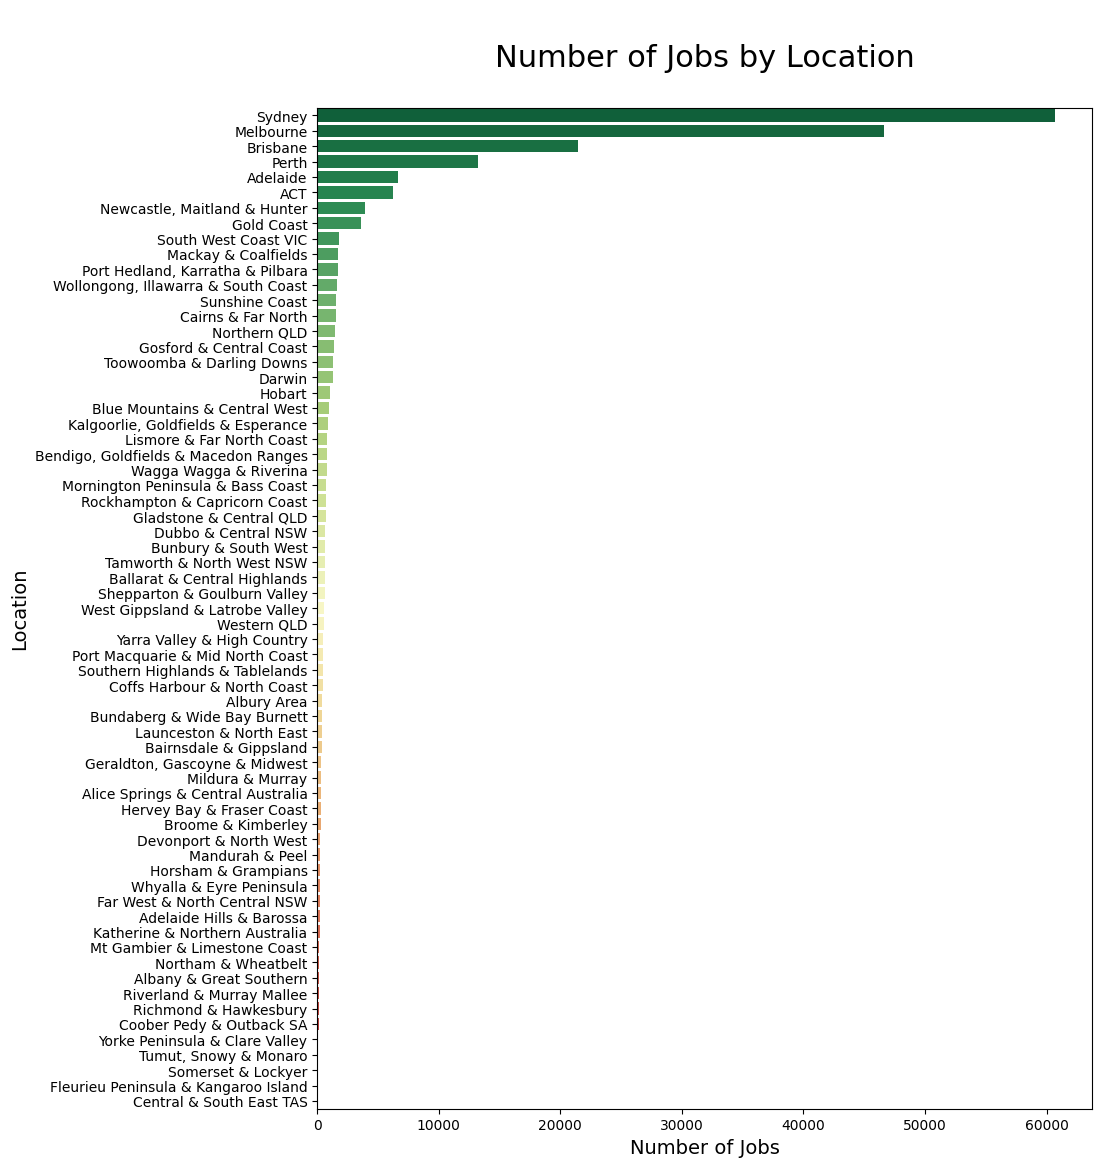

In [46]:
locations = df['Location'].dropna().unique()
df_location = pd.DataFrame({"Location": locations})
df_location['Count'] = df_location['Location'].apply(lambda x: pd.Series(len(df[df['Location']==x])))
df_location = df_location.sort_values(by='Count', ascending=False)
plt.figure(figsize=(10,13))
loc_plot = sns.barplot(x=df_location['Count'], y=df_location['Location'], palette='RdYlGn_r')
plt.title('\nNumber of Jobs by Location\n',size=22)
plt.ylabel("Location", size=14)
plt.xlabel('Number of Jobs', size=14)

plt.show()

#### ✓ Which city has more job? 

In [47]:
sydney_jobs_count = df[df['Location'] == 'Sydney'].shape[0]
brisbane_jobs_count = df[df['Location'] == 'Brisbane'].shape[0]
print("Number of jobs in Sydney:", sydney_jobs_count)
print("Number of jobs in Brisbane:", brisbane_jobs_count)
print("Sydney has more jobs")

Number of jobs in Sydney: 60729
Number of jobs in Brisbane: 21455
Sydney has more jobs


#### How many jobs each type (casual, fulltime, etc.) are there in each city?

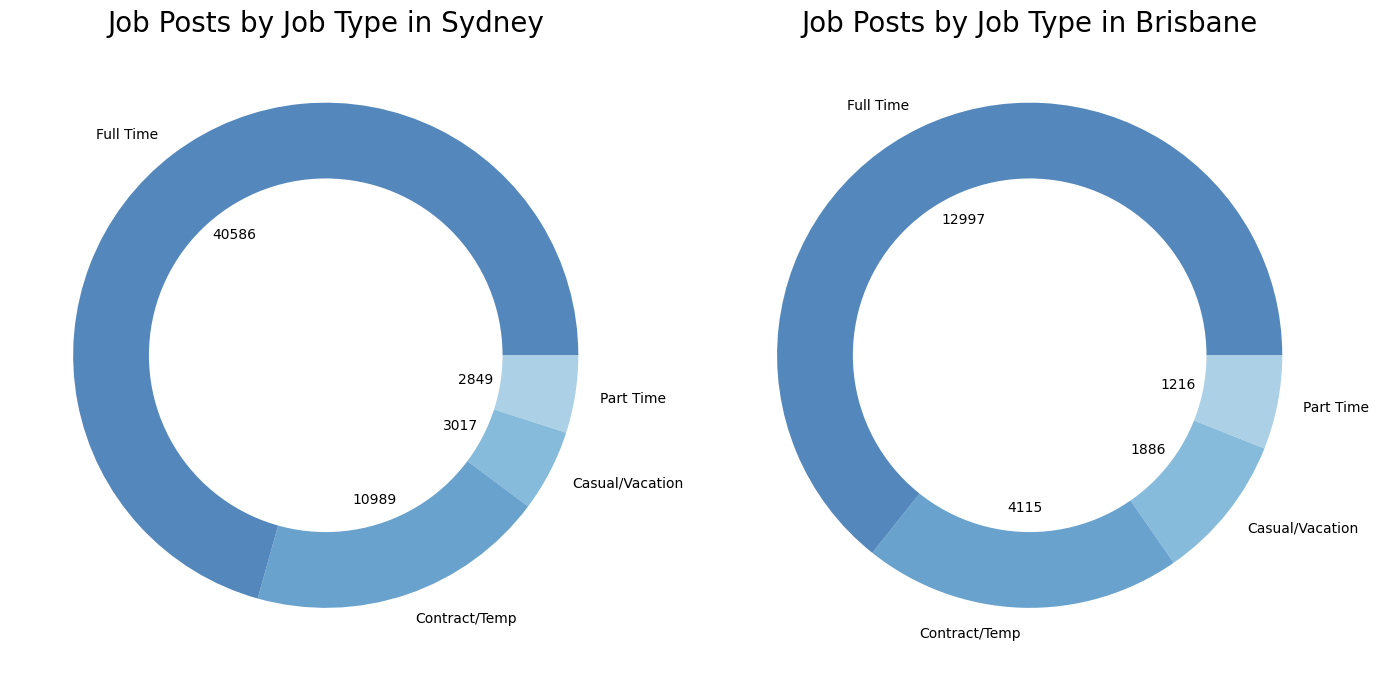

In [48]:
# Filter the data for Sydney and Brisbane
sydney_jobs = df[df['Location'] == 'Sydney']
brisbane_jobs = df[df['Location'] == 'Brisbane']

# Calculate the count of job types in Sydney and Brisbane
sydney_job_types_count = sydney_jobs['JobType'].value_counts().reset_index()
sydney_job_types_count.columns = ['JobType', 'Count']


brisbane_job_types_count = brisbane_jobs['JobType'].value_counts().reset_index()
brisbane_job_types_count.columns = ['JobType', 'Count']

# Define a custom autopct function to show actual counts
def absolute_value(val, total):
    return int(round(val/100.*total))

# Set up the plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# Plot the pie chart for Sydney
total_sydney = sydney_job_types_count['Count'].sum()  # Total counts for Sydney
p1, texts1, autotexts1 = ax1.pie(sydney_job_types_count['Count'], colors=sns.color_palette("Blues_r"), labels=sydney_job_types_count['JobType'], wedgeprops={'alpha':0.7}, autopct=lambda p: absolute_value(p, total_sydney))
ax1.set_title('Job Posts by Job Type in Sydney', size=20)

# Plot the pie chart for Brisbane
total_brisbane = brisbane_job_types_count['Count'].sum()  # Total counts for Brisbane
p2, texts2, autotexts2 = ax2.pie(brisbane_job_types_count['Count'], colors=sns.color_palette("Blues_r"), labels=brisbane_job_types_count['JobType'], wedgeprops={'alpha':0.7}, autopct=lambda p: absolute_value(p, total_brisbane))
ax2.set_title('Job Posts by Job Type in Brisbane', size=20)

# Add a center circle to create a donut shape
centre_circle1 = plt.Circle((0,0),0.70,color='black', fc='white', linewidth=0)
centre_circle2 = plt.Circle((0,0),0.70,color='black', fc='white', linewidth=0)
ax1.add_patch(centre_circle1)
ax2.add_patch(centre_circle2)

plt.tight_layout()
plt.show()


#### ✓ In each city, which are top 5 job sectors? How many jobs are there in each sector?  

In [49]:
#Calculate the number of jobs in each Classification in Sydney and identify the top five
sydney_top_sectors = sydney_jobs['Classification'].value_counts().head(5)
print("Top 5 job sectors in Sydney and their job counts:")
print(sydney_top_sectors)

#Calculate the number of jobs in each Classification in Brisbane and identify the top five
brisbane_top_sectors = brisbane_jobs['Classification'].value_counts().head(5)
print("\nTop 5 job sectors in Brisbane and their job counts:")
print(brisbane_top_sectors)

Top 5 job sectors in Sydney and their job counts:
Classification
Information & Communication Technology    9543
Hospitality & Tourism                     4071
Trades & Services                         4023
Accounting                                4008
Healthcare & Medical                      3335
Name: count, dtype: int64

Top 5 job sectors in Brisbane and their job counts:
Classification
Information & Communication Technology    2766
Trades & Services                         1992
Healthcare & Medical                      1823
Manufacturing, Transport & Logistics      1667
Hospitality & Tourism                     1334
Name: count, dtype: int64


#### ✓ Visualise the top 5 job sectors in pie chart for each city.* 

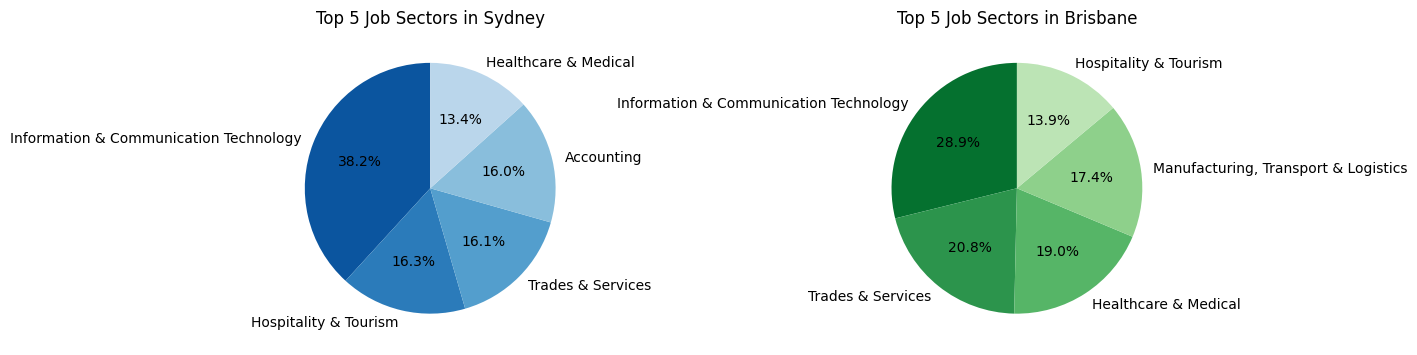

In [50]:

# Set up the plot
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Plot the pie chart for Sydney
ax[0].pie(sydney_top_sectors, labels=sydney_top_sectors.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Blues_r"))
ax[0].set_title('Top 5 Job Sectors in Sydney')

# Plot the pie chart for Brisbane
ax[1].pie(brisbane_top_sectors, labels=brisbane_top_sectors.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Greens_r"))
ax[1].set_title('Top 5 Job Sectors in Brisbane')

plt.tight_layout()
plt.show()

#### ✓ In each city, list the job salary range with the corresponding number of jobs. Which city is more well-paid? 

Job Salary Range and Corresponding Number of Jobs in Sydney and Brisbane:
Salary Range 0-30 - Sydney: 11740, Brisbane: 4077
Salary Range 30-40 - Sydney: 3967, Brisbane: 1565
Salary Range 40-50 - Sydney: 5369, Brisbane: 2734
Salary Range 50-60 - Sydney: 4859, Brisbane: 1933
Salary Range 60-70 - Sydney: 5286, Brisbane: 2032
Salary Range 70-80 - Sydney: 5029, Brisbane: 1799
Salary Range 80-100 - Sydney: 3738, Brisbane: 1327
Salary Range 100-120 - Sydney: 5578, Brisbane: 1934
Salary Range 120-150 - Sydney: 5703, Brisbane: 1462
Salary Range 150-200 - Sydney: 6270, Brisbane: 1612
Salary Range 200+ - Sydney: 3190, Brisbane: 980
'Sydney is more well-paid!'


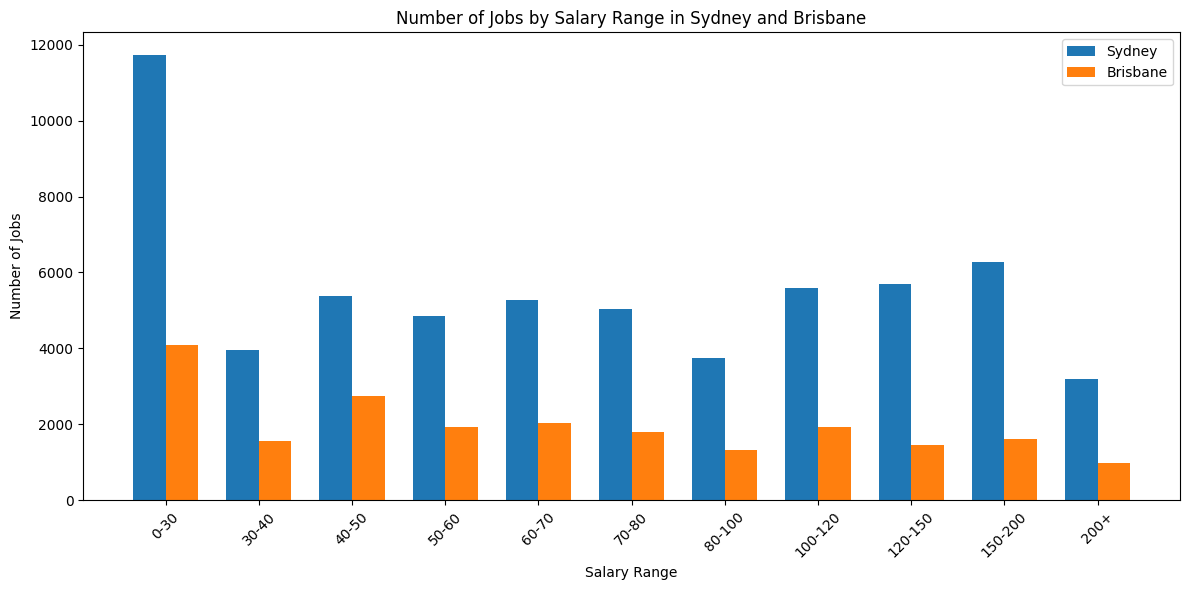

In [51]:
# Prepare the DataFrame for salary ranges (assuming the 'Low' and 'High' are correctly assigned and unique)
low = df['LowestSalary'].dropna().unique()
high = df['HighestSalary'].dropna().unique()
assert(len(low) == len(high))  # This ensures each low value has a corresponding high value

df_salary_ranges = pd.DataFrame({"Low": low, "High": high})
df_salary_ranges['Label'] = ['0-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-100', '100-120', '120-150', '150-200', '200+']

# Filter jobs by Sydney and Brisbane
sydney_jobs = df[df['Location'] == 'Sydney']
brisbane_jobs = df[df['Location'] == 'Brisbane']

# Calculate job counts for each salary range in Sydney and Brisbane
def count_jobs_in_range(city_jobs, salary_ranges):
    counts = []
    for index, row in salary_ranges.iterrows():
        count = city_jobs[(city_jobs['LowestSalary'] >= row['Low']) & (city_jobs['HighestSalary'] <= row['High'])].shape[0]
        counts.append(count)
    return counts

sydney_counts = count_jobs_in_range(sydney_jobs, df_salary_ranges)
brisbane_counts = count_jobs_in_range(brisbane_jobs, df_salary_ranges)

df_salary_ranges['SydneyCount'] = sydney_counts
df_salary_ranges['BrisbaneCount'] = brisbane_counts

# Print the job salary range with the corresponding number of jobs for Sydney and Brisbane
print("Job Salary Range and Corresponding Number of Jobs in Sydney and Brisbane:")
for index, row in df_salary_ranges.iterrows():
    print(f"Salary Range {row['Label']} - Sydney: {row['SydneyCount']}, Brisbane: {row['BrisbaneCount']}")
print("'Sydney is more well-paid!'")


# Plotting the comparison as bar charts
fig, ax = plt.subplots(figsize=(12, 6))
index = range(len(df_salary_ranges['Label']))
bar_width = 0.35

rects1 = ax.bar(index, df_salary_ranges['SydneyCount'], bar_width, label='Sydney')
rects2 = ax.bar([p + bar_width for p in index], df_salary_ranges['BrisbaneCount'], bar_width, label='Brisbane')

ax.set_xlabel('Salary Range')
ax.set_ylabel('Number of Jobs')
ax.set_title('Number of Jobs by Salary Range in Sydney and Brisbane')
ax.set_xticks([p + bar_width / 2 for p in index])
ax.set_xticklabels(df_salary_ranges['Label'])
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### ✓ List top 5 companies in each city? Which sectors do they belong to?

In [52]:
sydney_jobs = df[df['Location'] == 'Sydney']
brisbane_jobs = df[df['Location'] == 'Brisbane']

# Define a function to get top 5 companies and their sectors
def top_companies_and_sectors(city_jobs):
    # Group by company and classification, then count the number of jobs
    company_counts = city_jobs.groupby(['Company', 'Classification']).size().reset_index(name='Count')
    # Sort by count in descending order, take the top 5, and reset the index
    top_companies = company_counts.sort_values(by='Count', ascending=False).head(5).reset_index(drop=True)
    return top_companies

# Get top 5 companies in Sydney and Brisbane
top_sydney_companies = top_companies_and_sectors(sydney_jobs)
top_brisbane_companies = top_companies_and_sectors(brisbane_jobs)

In [53]:
print("Top 5 Companies in Sydney and Their Sectors:")
top_sydney_companies

Top 5 Companies in Sydney and Their Sectors:


,Company,Classification,Count
0,Jora Local,Hospitality & Tourism,1879
1,Paxus,Information & Communication Technology,346
2,Design & Build,Construction,331
3,Hays Accountancy & Finance,Accounting,294
4,Gough Property & Real Estate Recruiters,Real Estate & Property,278


In [54]:
print("\nTop 5 Companies in Brisbane and Their Sectors:")
top_brisbane_companies


Top 5 Companies in Brisbane and Their Sectors:


,Company,Classification,Count
0,Jora Local,Hospitality & Tourism,306
1,Paxus,Information & Communication Technology,170
2,The University of Queensland,Education & Training,164
3,Hudson,Information & Communication Technology,158
4,Exclaim IT,Information & Communication Technology,138


#### ✓ Between 2 cities, which do you think it is better for employees. Explain your choice.* 

In [55]:
print('Sydney is  better for employees than Brisbane, since it has more jobs opportunities and higher salary')

Sydney is  better for employees than Brisbane, since it has more jobs opportunities and higher salary


## 2. Analyse by time. (2 points) 

#### In this part, we will analyse the jobs based on the posting date. 
#### ✓ Visualise the number of job posts by month 

C:\Users\fafab\AppData\Local\Temp\ipykernel_31224\2123318650.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette="Blues")


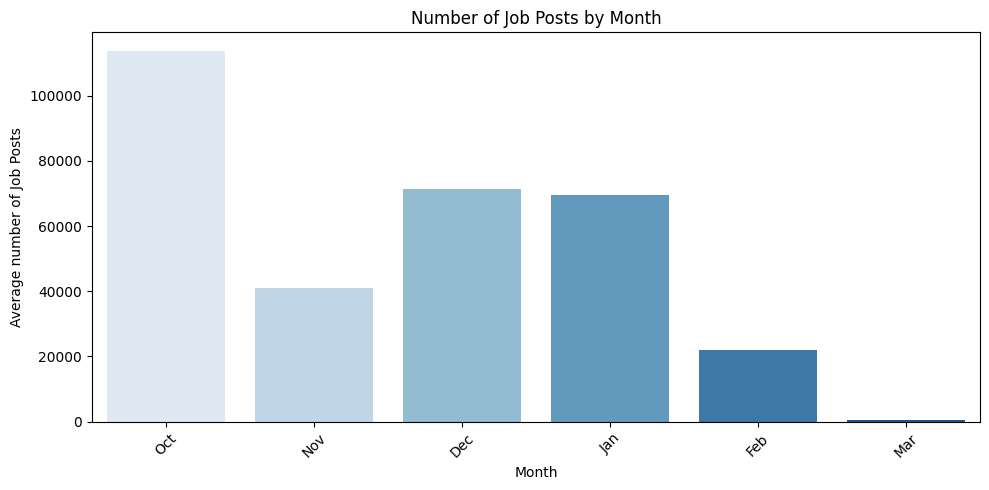

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame loading and preparation (assuming 'Date' is already a datetime column)
# df = pd.read_csv('your_data.csv')
# df['Date'] = pd.to_datetime(df['Date'])

# Extract month and year from Date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Adjust year for months to maintain chronological sequence Oct, Nov, Dec, Jan, Feb, Mar
df['AdjustYear'] = df['Year'] + (df['Month'] < 10).astype(int)  # Increment year if month is before October

# Combine adjusted year and month into a sortable format
df['YearMonth'] = df['AdjustYear'].astype(str) + '-' + df['Month'].astype(str).str.zfill(2)

# Count the number of job posts by this new combined YearMonth
monthly_counts = df.groupby('YearMonth').size()

# Ensure the months are sorted chronologically
monthly_counts = monthly_counts.sort_index()

# Optional: Filter for specific period if needed
# monthly_counts = monthly_counts['2019-10':'2020-03']

# Plotting
plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette="Blues")
plt.title('Number of Job Posts by Month')
plt.xlabel('Month')
plt.ylabel('Average number of Job Posts')

# Optional: Customize x-tick labels to show just the month names or as desired
month_labels = [pd.to_datetime(date).strftime('%b') for date in monthly_counts.index]
plt.xticks(ticks=range(len(month_labels)), labels=month_labels, rotation=45)

plt.tight_layout()
plt.show()


#### ✓ Visualise the number of job posts by day of week. 

C:\Users\fafab\AppData\Local\Temp\ipykernel_31224\295133552.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_of_week_counts.index, y=day_of_week_counts.values, palette='Blues')


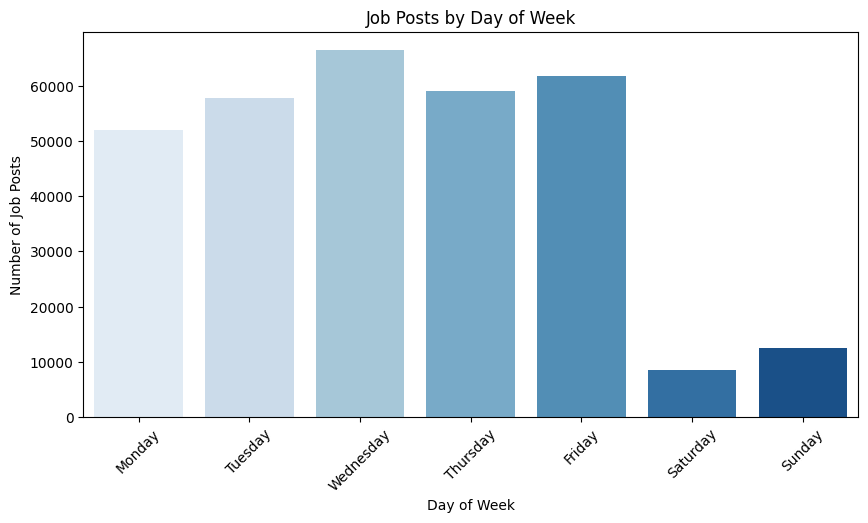

In [57]:
# Step 1: Extract day of the week
df['DayOfWeek'] = df['Date'].dt.day_name()

# Step 2: Count the number of job posts for each day of the week
day_of_week_counts = df['DayOfWeek'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Step 3: Plot the data
plt.figure(figsize=(10, 5))
sns.barplot(x=day_of_week_counts.index, y=day_of_week_counts.values, palette='Blues')
plt.title('Job Posts by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Job Posts')
plt.xticks(rotation=45)  # Rotate the x-ticks for better readability
plt.show()

#### ✓ Visualise the number of job posts by day of the month.

C:\Users\fafab\AppData\Local\Temp\ipykernel_31224\3923112591.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_of_month_counts.index, y=day_of_month_counts.values, palette="Blues")


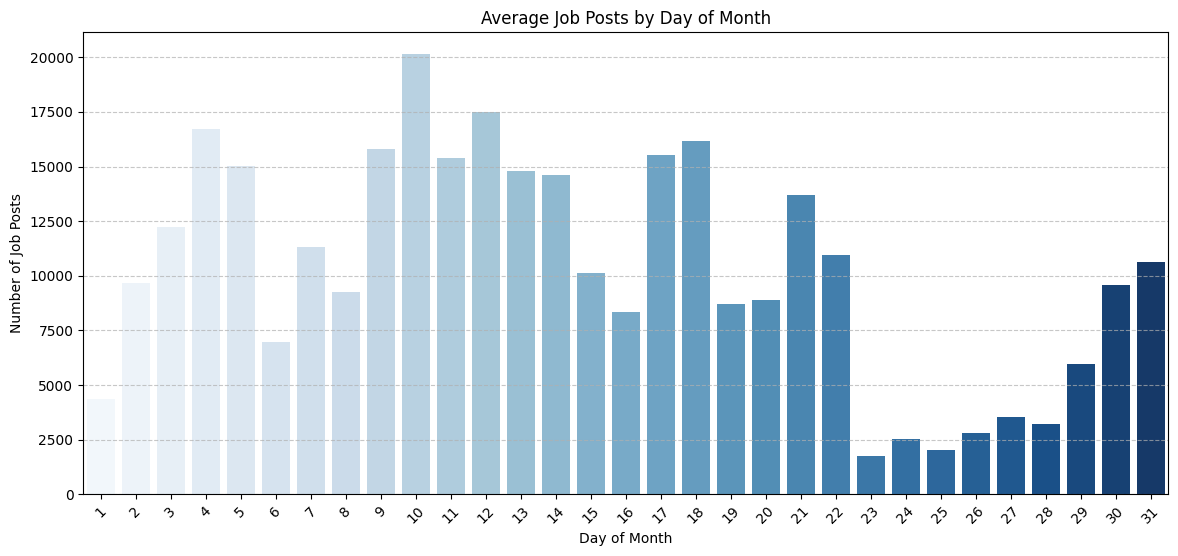

In [58]:
df['DayOfMonth'] = df['Date'].dt.day

# Step 2: Count the number of job posts for each day of the month
day_of_month_counts = df['DayOfMonth'].value_counts().sort_index()

# Step 3: Plot the data
plt.figure(figsize=(14, 6))  # Wider plot for better visibility of all days
sns.barplot(x=day_of_month_counts.index, y=day_of_month_counts.values, palette="Blues")
plt.title('Average Job Posts by Day of Month')
plt.xlabel('Day of Month')
plt.ylabel('Number of Job Posts')
plt.xticks(rotation=45)  # Rotate the x-ticks for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # Adding a grid for better readability of counts
plt.show()

#### ✓ Visualise trending of the job postings for the big cities.* 

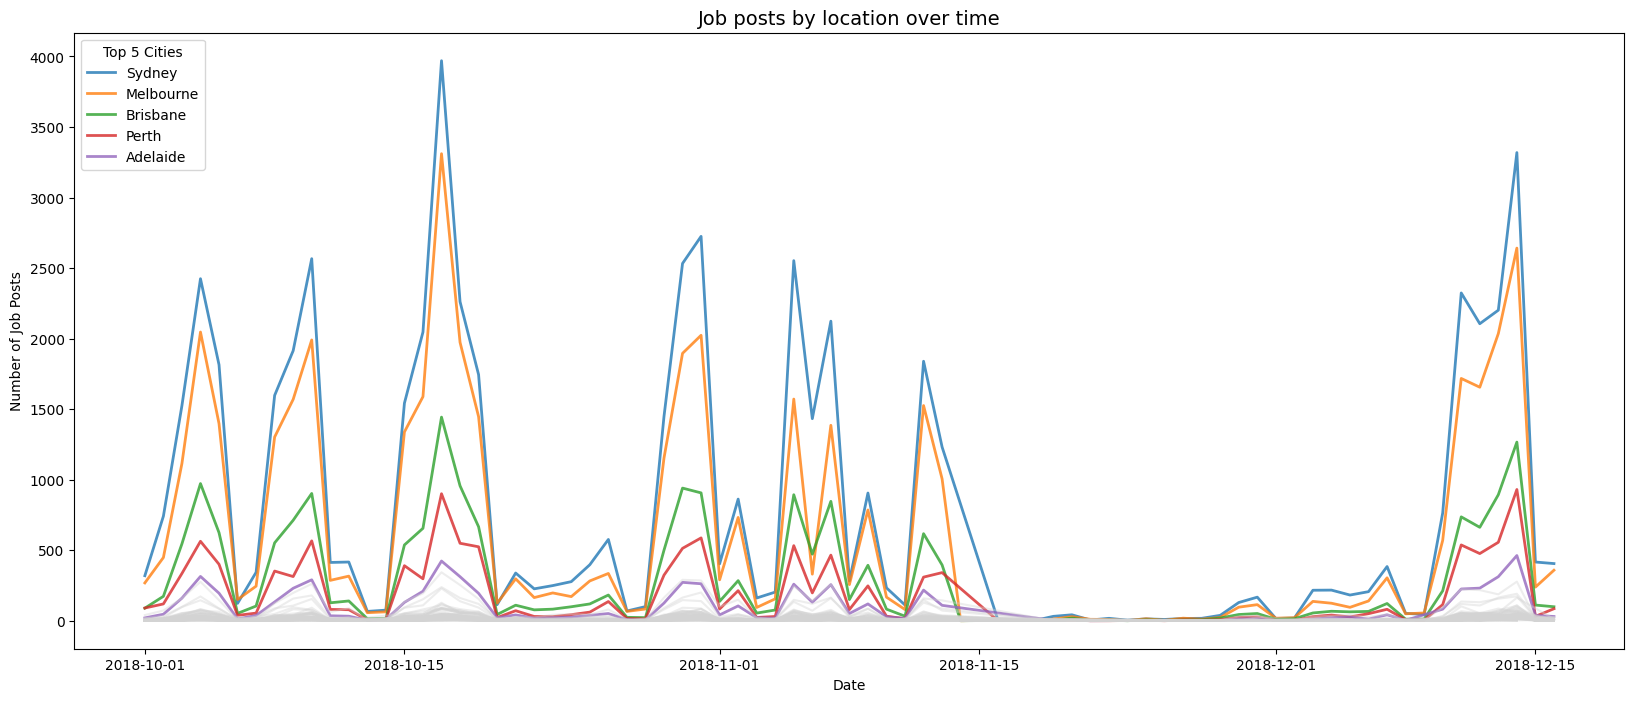

In [59]:
df_location = df[df['Location'].isna()==False]
plt.figure(figsize=(20,8))

# Get job counts per location
df_location_cnts = df_location.groupby('Location').count().reset_index()
df_location_top = df_location_cnts.sort_values(by=['Title'],ascending=False)['Location'].tolist()

# Plot top 5 in different colors
for location in df_location_top[:5]:
    df_current = df[df['Location'] == location].groupby(['Date']).count().reset_index().sort_values(by=['Date'])
    df_current.set_index('Date',inplace=True)
    
    df_timeseries = df_current['Title'].rename('Count')

    plt.plot(df_timeseries,alpha=0.8, lw=2)

# Plot the rest in light grey
for location in df_location_top[5:]:
    df_current = df_location[df_location['Location'] == location].groupby(['Date']).count().reset_index().sort_values(by=['Date'])
    df_current.set_index('Date',inplace=True)
    
    df_timeseries = df_current['Title'].rename('Count')

    plt.plot(df_timeseries,alpha=0.4,c='lightgrey')
    
plt.legend(df_location_top[:5], title='Top 5 Cities', frameon=True)
plt.title('Job posts by location over time',size=14)
plt.xlabel('Date')
plt.ylabel('Number of Job Posts')
plt.show()

#### ✓ Based on the above charts, provide your observation about the number of job posts over time. Give your own conclusion. 

The graph displays job postings for the top five cities with Sydney, Melbourne, Brisbane, Perth, and Adelaide in descending order of volume. Sydney consistently has the highest number of job posts. All cities show similar fluctuation patterns in their curves, differing only in magnitude but maintaining the same rank order. However, there does not seem to be a distinct pattern in the overall fluctuations. The highest peak of the curve falls on October 16, 2018, and the second highest peak is on December 15, 2018.

The record starts from October 1, 2018, to December 15, 2018. Notably, there is a significant drop or possibly missing data from November 16, 2018, to November 30, 2018.

## Part 4 – Discussion. [4 points] 

Scenario 1: Tom, a grade 12 student in Brisbane, has good results in all of the 
subjects in his school. He is finding a major in the University which can guarantee a 
job in his state (Queensland) with a good income (>=80K) in the future. Based on the 
current job market dataset, which major and the related subjects do you recommend 
him? Explain your choice.*** ( Max 750 words) 

In [60]:
# define QLD list
queensland_locations = [
    'Brisbane', 'Sunshine Coast', 'Gold Coast', 'Mackay & Coalfields',
    'Hervey Bay & Fraser Coast', 'Far West & North Central NSW',
    'Cairns & Far North', 'Toowoomba & Darling Downs', 'Rockhampton & Capricorn Coast',
    'Northern QLD', 'Gladstone & Central QLD', 'Western QLD', 'Bundaberg & Wide Bay Burnett'
]

# filter location only in QLD
df_queensland = df[df['Location'].isin(queensland_locations)]
df_queensland.head(15)

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,...,HighestSalary,JobType,AverageSalary,SalaryRange,Year,Month,AdjustYear,YearMonth,DayOfWeek,DayOfMonth
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,...,30,NaN,15.0,0-20K,2018,10,2018,2018-10,Sunday,7
7,37404350,Casual Café All-rounder in Woolloongabba,Jora Local,2018-10-07,Brisbane,CBD & Inner Suburbs,Hospitality & Tourism,Waiting Staff,A cafe in Woolloongabba is seeking a casual Ca...,NaN,...,30,NaN,15.0,0-20K,2018,10,2018,2018-10,Sunday,7
13,37404335,BPV_Utility All Rounders_Casual,ISS Facility Services,2018-10-07,Mackay & Coalfields,NaN,Hospitality & Tourism,Housekeeping,An exciting opportunity exists for Casual DIDO...,NaN,...,30,NaN,15.0,0-20K,2018,10,2018,2018-10,Sunday,7
15,37404259,Customer Service Officer,NaN,2018-10-07,Sunshine Coast,NaN,Call Centre & Customer Service,Customer Service - Call Centre,An opportunity for a customer service-focused ...,NaN,...,30,NaN,15.0,0-20K,2018,10,2018,2018-10,Sunday,7
21,37404239,Casual Barista in Murarrie,Jora Local,2018-10-07,Brisbane,CBD & Inner Suburbs,Hospitality & Tourism,Bar & Beverage Staff,A cafe in Murarrie is seeking a casual Barista...,NaN,...,30,NaN,15.0,0-20K,2018,10,2018,2018-10,Sunday,7
25,37404209,Casual Cook in Palm Beach,Jora Local,2018-10-07,Gold Coast,NaN,Hospitality & Tourism,Chefs/Cooks,A cafe/restaurant in Palm Beach is seeking a c...,NaN,...,30,NaN,15.0,0-20K,2018,10,2018,2018-10,Sunday,7
26,37404396,Clinical Document Processing and Quality Assur...,West Moreton Hospital and Health Service,2018-10-07,Brisbane,Western Suburbs & Ipswich,Administration & Office Support,Records Management & Document Control,administrative and systems support in relation...,NaN,...,30,NaN,15.0,0-20K,2018,10,2018,2018-10,Sunday,7
40,37404400,Project Officer,Metro South Health,2018-10-07,Brisbane,NaN,Administration & Office Support,Other,Asset and Infrastructure Services are looking ...,NaN,...,30,NaN,15.0,0-20K,2018,10,2018,2018-10,Sunday,7
44,37404192,"Retail Sales, Online Selling, Receptionist and...",Wholesale Furniture Outlet,2018-10-07,Brisbane,CBD & Inner Suburbs,Sales,Sales Representatives/Consultants,Are you passionate about sales? Do you have a ...,NaN,...,30,NaN,15.0,0-20K,2018,10,2018,2018-10,Sunday,7
55,37404398,Project Officer - BRiTA Futures,Metro South Health,2018-10-07,Brisbane,NaN,Administration & Office Support,Other,Queensland Transcultural Mental Health Centre ...,NaN,...,30,NaN,15.0,0-20K,2018,10,2018,2018-10,Sunday,7


In [61]:
high_income_jobs = df_queensland[df_queensland['AverageSalary'] >= 80]
high_income_jobs

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,...,HighestSalary,JobType,AverageSalary,SalaryRange,Year,Month,AdjustYear,YearMonth,DayOfWeek,DayOfMonth
14314,37399942,Industry Trainers needed – Central Queensland,Corporate Protection Australia,2018-10-05,Gladstone & Central QLD,NaN,Education & Training,Teaching - Vocational,"Baseline Training Pty Ltd, part of the CPA Gro...","<p>Corporate Protection Australia Group, incor...",...,100,Casual/Vacation,90.0,80-100k,2018,10,2018,2018-10,Friday,5
14317,37399918,Technical Support Manager - Horticulture and B...,Evolve Scientific Recruitment,2018-10-05,Far West & North Central NSW,NaN,"Farming, Animals & Conservation",Agronomy & Farm Services,Technical Support Manager | Regional NSW | Fer...,<strong>About the company:</strong><br>The com...,...,100,Full Time,90.0,80-100k,2018,10,2018,2018-10,Friday,5
14338,37399769,Electrician,JTMEC Pty Ltd,2018-10-05,Western QLD,NaN,"Mining, Resources & Energy",Mining - Engineering & Maintenance,JTMEC are seeking expressions of interest from...,<p><strong>YOU CAN RELY ON US</strong></p>\n ...,...,100,Full Time,90.0,80-100k,2018,10,2018,2018-10,Friday,5
14349,37399675,PHARMACIST - 2 IC,Star Pharmacy Group,2018-10-05,Cairns & Far North,NaN,Healthcare & Medical,Pharmacy,Exclusive opportunity to have permanent roster...,"<h2 class=""subheading"">Smithfield - Star Disco...",...,100,Part Time,90.0,80-100k,2018,10,2018,2018-10,Friday,5
14354,37399661,Clinical Care Coordinator - Toowoomba,Redstone Recruitment Pty Ltd,2018-10-05,Toowoomba & Darling Downs,NaN,Healthcare & Medical,Nursing - Aged Care,Experienced Registered Nurse/Clinical Nurse re...,"<p style=""text-align:center;""><strong>Clinical...",...,100,Full Time,90.0,80-100k,2018,10,2018,2018-10,Friday,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197192,37829161,Mining Superintendent,Pivot Management Group,2018-11-29,Mackay & Coalfields,NaN,"Mining, Resources & Energy",Mining - Operations,Experienced mining production leaders role/ Op...,<p> </p>\n <p><strong>About the busin...,...,999,Full Time,599.5,550-600k,2018,11,2018,2018-11,Thursday,29
197196,37828958,Chief Financial Officer & Company Secretary,Randstad - Accounting,2018-11-29,Brisbane,Southern Suburbs & Logan,Accounting,Company Secretaries,CFO & Company Secretary,"<p style=""text-align:center;""><strong>High pro...",...,999,Full Time,599.5,550-600k,2018,11,2018,2018-11,Thursday,29
197202,37828611,High Rise Project Manager,Hays Construction,2018-11-29,Gold Coast,NaN,Construction,Project Management,High rise Project Manager required for central...,<p>High rise Project Manager required for cent...,...,999,Full Time,599.5,550-600k,2018,11,2018,2018-11,Thursday,29
197219,37828361,Medical Officer,Coal Services Pty Ltd,2018-11-29,Brisbane,NaN,Healthcare & Medical,General Practitioners,Coal Services Health are looking for a Medical...,<p>&nbsp;</p>\n <ul>\n <li><st...,...,999,Full Time,599.5,550-600k,2018,11,2018,2018-11,Thursday,29


In [62]:
# View classifications for good income (>=80K) jobs
classification_counts = high_income_jobs['Classification'].value_counts().sort_values(ascending=False)
classification_counts 

Classification
Information & Communication Technology    2109
Healthcare & Medical                      1666
Mining, Resources & Energy                1194
Engineering                                811
Government & Defence                       760
Construction                               689
Education & Training                       475
Trades & Services                          418
Accounting                                 385
Sales                                      373
Legal                                      373
Manufacturing, Transport & Logistics       270
Human Resources & Recruitment              214
Banking & Financial Services               172
Marketing & Communications                 130
CEO & General Management                   105
Real Estate & Property                      94
Consulting & Strategy                       92
Administration & Office Support             86
Community Services & Development            74
Insurance & Superannuation                  7

C:\Users\fafab\AppData\Local\Temp\ipykernel_31224\641475248.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classification_counts.values, y=classification_counts.index, palette="viridis")


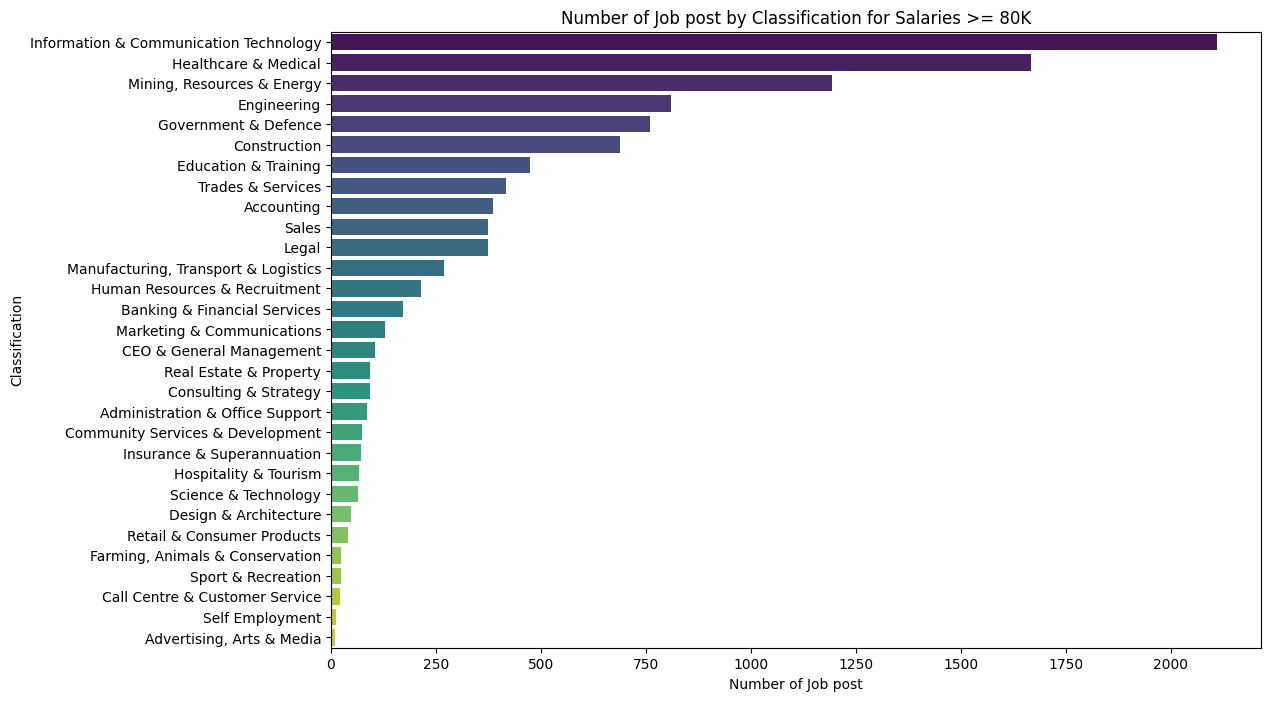

In [63]:
# Plot classifications for good income (>=80K) job posts
plt.figure(figsize=(12, 8))
sns.barplot(x=classification_counts.values, y=classification_counts.index, palette="viridis")
plt.title('Number of Job post by Classification for Salaries >= 80K')
plt.xlabel('Number of Job post')
plt.ylabel('Classification')
plt.show()

##### ⬆ From this chart, we can see that Information & Communication Technology has the highest number of posts with salaries >= 80K, indicating the most good-income job opportunities.

In [64]:
import seaborn as sns
# Filter out the jobs in Information & Communication Technology
ict_jobs = df_queensland[df_queensland['Classification'] == 'Information & Communication Technology']
# Calculate the mean salary for each sub-classification and sort them
mean_salary = ict_jobs.groupby('SubClassification')['AverageSalary'].mean().sort_values(ascending=False)

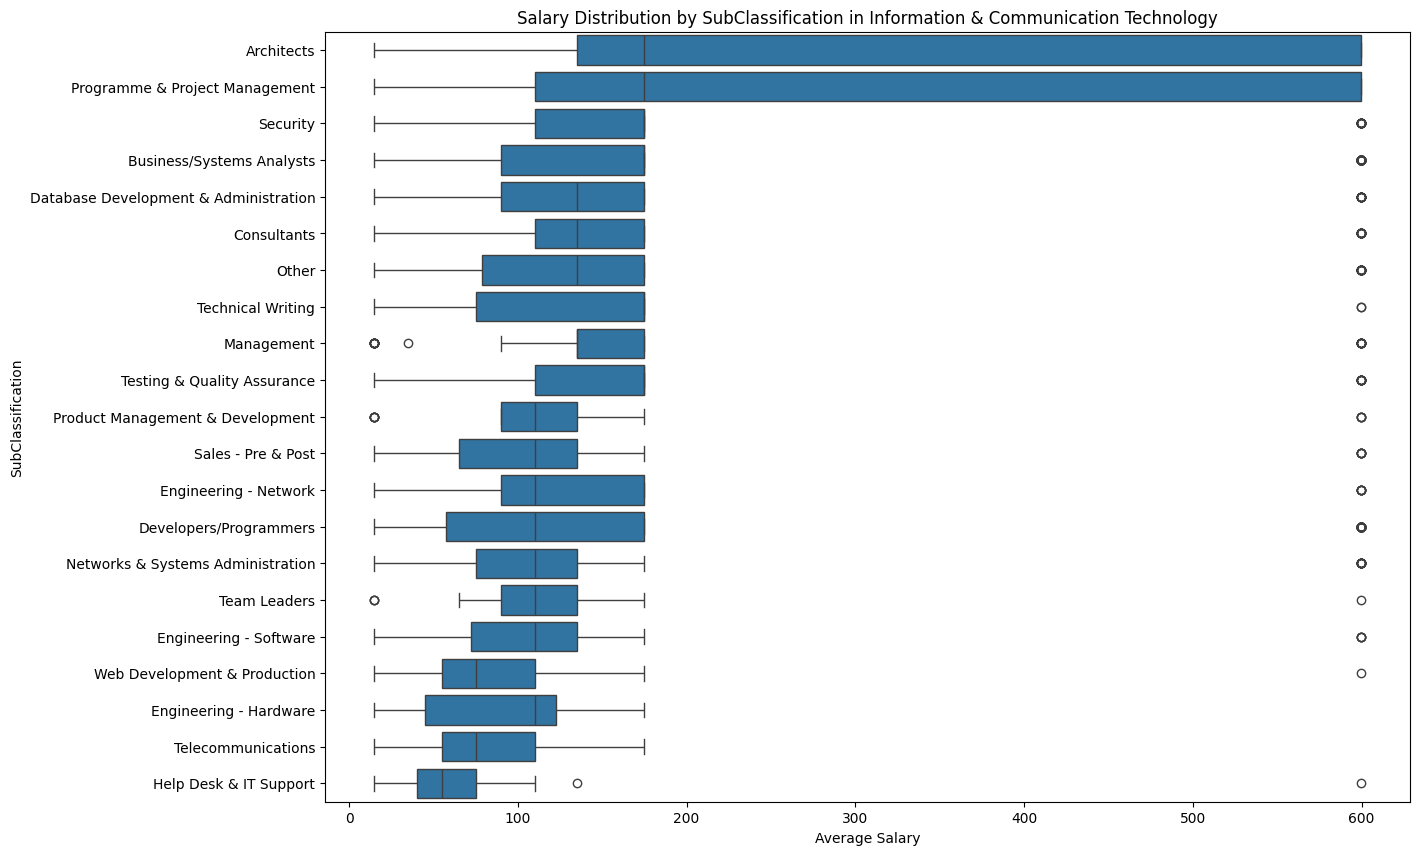

In [65]:
# Plot a box plot to compare salary distributions across different sub-classifications, with x and y axes swapped
plt.figure(figsize=(14, 10))
sns.boxplot(y='SubClassification', x='AverageSalary', data=ict_jobs, order=mean_salary.index)
plt.title('Salary Distribution by SubClassification in Information & Communication Technology')
plt.ylabel('SubClassification')
plt.xlabel('Average Salary')
plt.show()

Fristly, Architects and Programme & Project Management are the highest-paying sub-classifications in the ICT field. Secondly, most other sub-classifications have average incomes exceeding 80K, these include Security, Business/Systems Analysts, Database Development & Administration, etc. Lastly, Telecommunications and Help Desk & IT Support have relatively low average incomes, even below 80K, which means that high-income opportunities are relatively scarce in these fields.

Based on the current job market dataset, I recommend he pursue a major in Architects or Programme & Project Management if he aims for the highest salary in the future. These fields offer the highest incomes in the ICT sector.

However, he should also consider his interests. If he is inclined towards Security, Business/Systems Analysis, or Developers/Programmers, these areas also provide good income potential with average salaries exceeding 80K.

Low-Income Fields:

Telecommunications and Help Desk & IT Support have lower average incomes and may not align with his goal of achieving a high salary.
In summary, Architects and Programme & Project Management are the top recommendations for high salaries, but personal interests in other high-paying ICT fields should also be considered.
